# Goals for this lab:
- Learn what is Lasso/Ridge, why we are using it and its computational behaviors and statistical meanings.
- Learn to fit a lasso/ridge model using glmnet.

In [3]:
require('glmnet')

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



### ordinary least square:

$$ \textrm{minimize} \sum_i (Y_i - c_1 X1_i - c_2 X2_i\cdots c_p Xp_i)^2
$$

### training error and test error
-------------------

## Question 1:


## Suppose you have a data matrix $X\in \mathbb R^{n\times d}$ with n samples and d features. $n = 1000$ and $d = 100$. The response $Y$ is independent from X and obeys standard Gaussian distribution $Y_{i} \sim N(0,1)$. If we are fiting the ordinary least square (OLS) model using X to predict Y, how large will the training error be? 

## (The training error is the variance of the residue $\frac{1}{n} \sum_{i=1}^n (Y_i - \hat Y_i)^2$.)

A. Around 1

B. Around .9

C. Around .5

D. Around 0.1


In [22]:
n = 1000
p = 100
X = matrix(rnorm(n * p), nrow = n, ncol = p)
Y = matrix(rnorm(n), nrow = n, ncol = 1)
coef = solve(t(X) %*% X, t(X) %*% Y)
print(var(Y - X %*% coef))

          [,1]
[1,] 0.9044673


### What if X is binary/Cauchy/Poisson/uniform?

### What if Y is binary/uniform?

In [34]:
X = matrix(runif(n * p), nrow = n, ncol = p)
Y = matrix(runif(n), nrow = n, ncol = 1)
coef = solve(t(X) %*% X, t(X) %*% (Y - mean(Y)))
print(var(Y - X %*% coef)/var(Y))
#print(var(Y))

          [,1]
[1,] 0.8654392


--------------------------

### High dimensional statistics: $\frac{d}{n} \geq constant$. 

Big data not only means more samples but also more features.

In order to alleviate the overfitting effect, we can add a regularizer in the objective.

LASSO:


$$ \textrm{minimize} \sum_i (Y_i - c_1 X1_i - c_2 X2_i\cdots c_p Xp_i)^2 + \lambda (|c_1|+\cdots + |c_p|)
$$

Ridge:

$$ \textrm{minimize} \sum_i (Y_i - c_1 X1_i - c_2 X2_i\cdots c_p Xp_i)^2 + \lambda (|c_1|^2+\cdots + |c_p|^2)
$$

Elastic net:

$$ \textrm{minimize} \sum_i (Y_i - c_1 X1_i - c_2 X2_i\cdots c_p Xp_i)^2 + \lambda ( (1 - \alpha)|c_1|^2 + \alpha |c_1|+\cdots + (1 - \alpha)|c_p|^2 + \alpha|c_p|)
$$



## Question 2 (Discussion): 

## What are the advantages/disadvantages of using LASSO?
---------------------------

In [6]:
?glmnet

           [,1]
[1,] 0.08380542


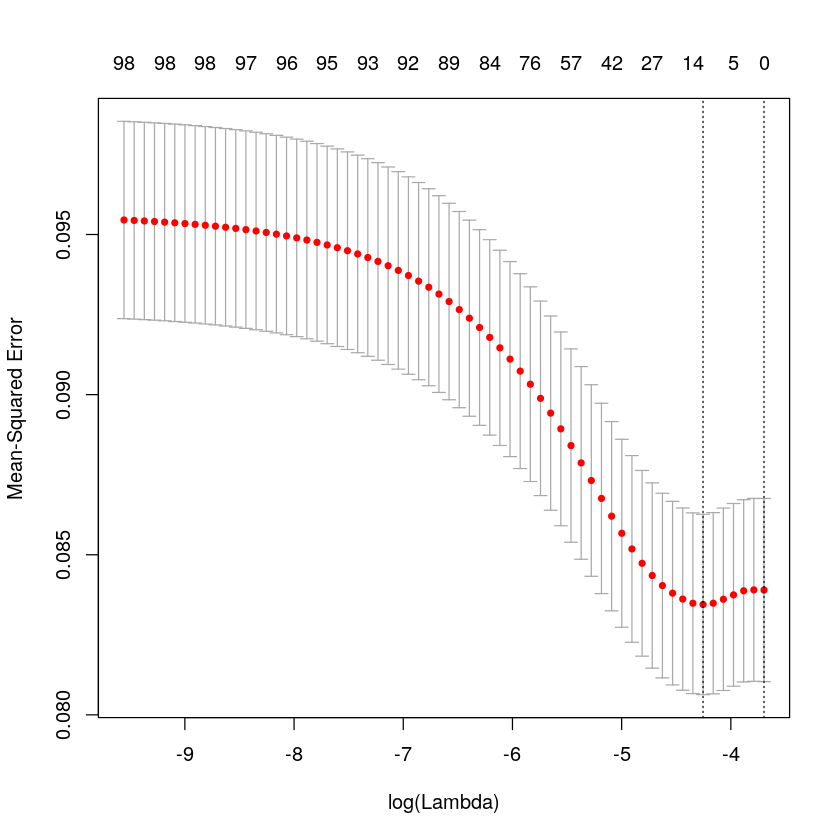

In [7]:
out <- cv.glmnet(x = X, y = Y, alpha = 1)
print(var(Y))
plot(out)

           [,1]
[1,] 0.08380542


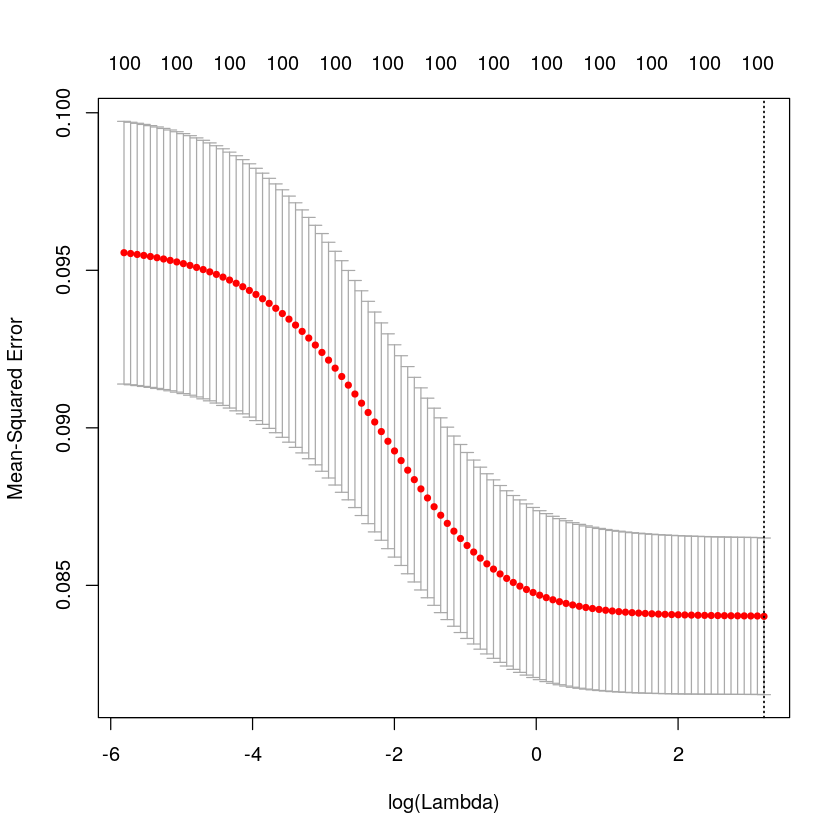

In [8]:
out <- cv.glmnet(x = X, y = Y, alpha = 0)
print(var(Y))
plot(out)

In [37]:
start = proc.time()
out <- cv.glmnet(x = X, y = Y, alpha = 1)
end = proc.time()  - start
print(end)
start = proc.time()
out <- cv.glmnet(x = X, y = Y, alpha = 0)

#out <- solve(t(X) %*% X, t(X) %*% Y)
end = proc.time() - start
print(end)

   user  system elapsed 
  0.294   0.000   0.294 
   user  system elapsed 
  0.307   0.000   0.307 
